<a href="https://colab.research.google.com/github/jbarker6706/portfolio1/blob/master/MSDS462Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical   
import tensorflow as tf
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report


Using TensorFlow backend.


In [7]:
# Load the fashion-mnist pre-shuffled train data and test data
(X, y), (X_t, y_t) = tf.keras.datasets.fashion_mnist.load_data()
print("X_train shape:", X.shape, "y_train shape:", y.shape)


X_train shape: (60000, 28, 28) y_train shape: (60000,)


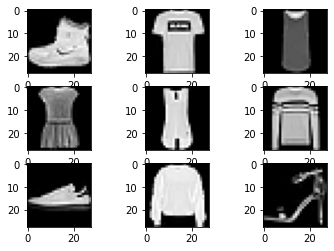

In [8]:
#Display the first nine images
for i in range(9):
# define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [0]:
#Prep and normalize data for Neural netwok to be between 0 and 1
X_train = X.astype('float32') / 255
X_test = X_t.astype('float32') / 255

In [0]:
#Continue data preperation
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# one hot encode target values
y_train = to_categorical(y)
y_test = to_categorical(y_t)

In [11]:
#Build Convnet model to train on the MNIST fashion data
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

# compile model
opt = Adam(lr=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [0]:
NUM_EPOCHS = 10

In [25]:
scores, histories = list(), list()
n_folds=5
# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)
# enumerate splits
for train_ix, test_ix in kfold.split(X_train):
    # select rows for train and test
    trainX, trainY, testX, testY = X_train[train_ix], y_train[train_ix], X_train[test_ix], y_train[test_ix]
    # fit model
    fashhist = model.fit(trainX, trainY, epochs=NUM_EPOCHS, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)

> 95.008
> 97.133
> 97.200
> 96.483
> 96.750


In [0]:
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
    "sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [0]:
y_preds = model.predict(X_test, verbose=0)
test_preds = np.argmax(y_preds, axis = 1)

[INFO] evaluating network...
              precision    recall  f1-score   support

         top       0.78      0.82      0.80      1000
     trouser       1.00      0.97      0.98      1000
    pullover       0.75      0.80      0.77      1000
       dress       0.88      0.89      0.89      1000
        coat       0.80      0.78      0.79      1000
      sandal       0.98      0.98      0.98      1000
       shirt       0.70      0.65      0.67      1000
     sneaker       0.93      0.97      0.95      1000
         bag       0.99      0.97      0.98      1000
  ankle boot       0.98      0.93      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



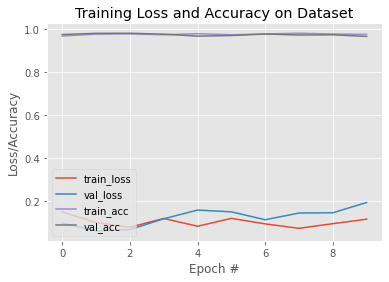

In [29]:
preds = model.predict(X_test)
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1),
    target_names=labelNames))
# plot the training loss and accuracy
N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), fashhist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), fashhist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), fashhist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), fashhist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")